# Task 1  

## General instructions

First, update the following text to have a link to your Homework 2 GitHub repository:

**UPDATE THIS LINK**
https://github.com/hazelvaq/eds220-hwk-3.git

Add comments for all your code and commit as needed. Err on the side of commenting and commiting too much for now. Points will be deducted for insufficient comments.


## About the data
In this task you will use two datsets:

**First dataset**

The first dataset contains information about [spilling incidents in the state of New York](https://data.ny.gov/Energy-Environment/Spill-Incidents/u44d-k5fk). 
The data portal has plenty of information. 
You will find extra information and metadata for this datset in the 'NYSDEC_SpillIncidents_Overview.pdf' and 'NYSDEC_SpillIncidents_DataDictionary.pdf' documents available at the portal.

You can access this datset via its URL or download it as a csv. 
If you chose to access it via URL, it will take a while to load every time you import it. 

**Second dataset**

The second dataset is a [TIGER shapefile from the United States Census Bureau](https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.2022.html#list-tab-790442341). 
For this task you will need to **download the 2022 counties (and equivalent) TIGER shapefile**. 
You can check the [metadata for all the TIGER shapefiles here](https://www.census.gov/programs-surveys/geography/technical-documentation/complete-technical-documentation/tiger-geo-line.html). 



## File management
Make sure all your data files are inside a directory named 'data' inside your repository's directory (working directory).

## Datasets description
Read the metadata for both datsets and write a brief description about each once. Indicate the date sources and date of access.

**NY Spill Incidents**: This dataset contains data regarding petroleum spills and other hazardous waste in NY state. The data includes admin information, date/time, location, source, cause, type, etc. Data was first recorded in 1978, dates before then are estimates of potential spills - updated daily.

source: https://data.ny.gov/Energy-Environment/Spill-Incidents/u44d-k5fk

date accessed: 11/8/2023

**2022 counties (and equivelant)TIGER Shapefile**: This dataset includes the boundaries of counties and equivelants for the United States. The shapefiles include polygon boundaries of geographic areas and features, roads and hydrography, and point features. Does not contain sensitive data. Each cpuntu has:
- 3-character FIPS code unique within a state
- 8-character ANSI code

source: https://www.census.gov/cgi-bin/geo/shapefiles/index.php

date accessed: 11/8/2023



## FINAL CODE

You will use the next cell at the end of the task. Leave it blank for now. 

In [1]:
### ===== FINAL CODE =====

<!-- write your description in this markdwon cell -->

## Import libraries

In [2]:
# import libraries here
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# import numpy too
import numpy as np

## Import data 
In the next cell:

- Import the NY spills data as a variable named `spills`. 
- Import the US counties shapefile as a variable named `counties`.


In [3]:
# Import NY spills data
spills = pd.read_csv('data/Spill_Incidents_20231107.csv')

# Import US counties shapefile 
counties = gpd.read_file('data/tl_2022_us_county/tl_2022_us_county.shp')

## Prepare spills data

This section refers to the `spills` dataframe. 
Check the outputs carefully, they will give you context about the next exercises.

### Exploration

In the next cells:

1. Check the dataframe's head
2. Simplify column names as needed
3. Check the data types of the columns
4. Check the unique values in the `material_family` column
5. Check the unique values in the `county` column

You can add any other cells of preliminary data exploration.

In [4]:
#1. view 3 first rows of spills
spills.head(3)

,Spill Number,Program Facility Name,Street 1,Street 2,Locality,County,ZIP Code,SWIS Code,DEC Region,Spill Date,Received Date,Contributing Factor,Waterbody,Source,Close Date,Material Name,Material Family,Quantity,Units,Recovered
0,107132,MH 864,RT 119/MILLWOOD RD,NaN,ELMSFORD,Westchester,NaN,6000,3,10/10/2001,10/10/2001,Unknown,NaN,Unknown,10/15/2001,unknown material,Other,10,Gallons,0
1,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0,Pounds,0
2,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0,NaN,0


In [5]:
# 2.
# Spills: Change column names to lower case and replace space with _
spills.columns = spills.columns.str.lower().str.replace(" ","_")
# check if column names were updated
print(spills.columns)

Index(['spill_number', 'program_facility_name', 'street_1', 'street_2',
       'locality', 'county', 'zip_code', 'swis_code', 'dec_region',
       'spill_date', 'received_date', 'contributing_factor', 'waterbody',
       'source', 'close_date', 'material_name', 'material_family', 'quantity',
       'units', 'recovered'],
      dtype='object')


In [6]:
# 3.
# Spills: Check the data types of the columns
print(spills.dtypes)

spill_number              int64
program_facility_name    object
street_1                 object
street_2                 object
locality                 object
county                   object
zip_code                 object
swis_code                 int64
dec_region                int64
spill_date               object
received_date            object
contributing_factor      object
waterbody                object
source                   object
close_date               object
material_name            object
material_family          object
quantity                 object
units                    object
recovered                object
dtype: object


In [7]:
# 4. Check the unique values in the `material_family` column
spills.material_family.unique()

array(['Other', 'Petroleum', 'Hazardous Material', 'Oxygenates'],
      dtype=object)

In [8]:
# 5. Check the unique values in the `county` column
spills.county.unique()

array(['Westchester', 'Queens', 'Bronx', 'Sullivan', 'Cortland',
       'New York', 'Ulster', 'Kings', 'Orange', 'Dutchess', 'Onondaga',
       'Saratoga', 'Cayuga', 'Oswego', 'Warren', 'Niagara', 'Rockland',
       'Nassau', 'Jefferson', 'Schenectady', 'Albany', 'Monroe',
       'St Lawrence', 'Richmond', 'Clinton', 'Lewis', 'Essex', 'Chenango',
       'Erie', 'Livingston', 'Wayne', 'Suffolk', 'Orleans', 'Ontario',
       'Genesee', 'Otsego', 'Tompkins', 'Madison', 'Chemung', 'Seneca',
       'Oneida', 'Broome', 'Hamilton', 'Washington', 'Schuyler',
       'Franklin', 'Columbia', 'Fulton', 'Herkimer', 'Schoharie',
       'Rensselaer', 'Montgomery', 'Putnam', 'Delaware',
       'New Jersey - Region 2', 'Steuben', 'Tioga', 'Chautauqua',
       'Cattaraugus', 'Wyoming', 'Yates', 'Greene',
       'Pennsylvania - Region 9', 'Allegany', 'New Jersey - Region 3 (N)',
       'Cattaraugus Indian Reservation', 'New Jersey - Region 3 (T)',
       'Canada - Region 6', 'Canada - Region 9',
       '

### Data selection

1. Select data about petroleum spills that took place between January 1st 2023, and October 31st (including both dates), 2023. Store it in a variable named `petr_23`. The data selection should occur in a single line. You may add cells if you needed.

In [9]:
# spill_date, receive_date, & close_date are objects they should be dates
# convert the date columns from objects to dates 
spills.spill_date = pd.to_datetime(spills.spill_date)
spills.received_date = pd.to_datetime(spills.received_date)
spills.close_date = pd.to_datetime(spills.close_date)

# check updated data types of columns
spills.dtypes

spill_number                      int64
program_facility_name            object
street_1                         object
street_2                         object
locality                         object
county                           object
zip_code                         object
swis_code                         int64
dec_region                        int64
spill_date               datetime64[ns]
received_date            datetime64[ns]
contributing_factor              object
waterbody                        object
source                           object
close_date               datetime64[ns]
material_name                    object
material_family                  object
quantity                         object
units                            object
recovered                        object
dtype: object

In [10]:
# Petroleum spill between Jan 1, 2023 and Oct 31, 2023
petr_23 = spills[(spills.spill_date > "01/01/2023") & (spills.spill_date < "10/31/2023") & (spills.material_family == "Petroleum")]
# view head of petr_23
petr_23.head()

,spill_number,program_facility_name,street_1,street_2,locality,county,zip_code,swis_code,dec_region,spill_date,received_date,contributing_factor,waterbody,source,close_date,material_name,material_family,quantity,units,recovered
220,2301892,*** TEST SPILL ***,*** TEST SPILL ***,NaN,*** TEST SPILL ***,Onondaga,00000,3415,7,2023-06-06,2023-06-06,Tank Test Failure,NaN,Unknown,2023-07-12,#2 fuel oil,Petroleum,0,Gallons,0
221,2301892,*** TEST SPILL ***,*** TEST SPILL ***,NaN,*** TEST SPILL ***,Onondaga,00000,3415,7,2023-06-06,2023-06-06,Tank Test Failure,NaN,Unknown,2023-07-12,"used oil (heating, on-site consumption)",Petroleum,0,NaN,0
222,2301892,*** TEST SPILL ***,*** TEST SPILL ***,NaN,*** TEST SPILL ***,Onondaga,00000,3415,7,2023-06-06,2023-06-06,Tank Test Failure,NaN,Unknown,2023-07-12,#2 fuel oil (on-site consumption),Petroleum,0,NaN,0
223,2301892,*** TEST SPILL ***,*** TEST SPILL ***,NaN,*** TEST SPILL ***,Onondaga,00000,3415,7,2023-06-06,2023-06-06,Tank Test Failure,NaN,Unknown,2023-07-12,Diesel (E-Gen),Petroleum,0,NaN,0
225,2301892,*** TEST SPILL ***,*** TEST SPILL ***,NaN,*** TEST SPILL ***,Onondaga,00000,3415,7,2023-06-06,2023-06-06,Tank Test Failure,NaN,Unknown,2023-07-12,waste oil/used oil,Petroleum,0,NaN,0


2. Verify that `petr_23` only has data for petroleum spills 

In [11]:
# Verify petr_23 only has data for petroleum spills
petr_23.material_family.unique()

array(['Petroleum'], dtype=object)

3. Verify that `petr_23` only has data for 2023. 
HINT: if you converted the `spill_date` column to datetime, you can use `petr_23.spill_date.dt.year.unique()`

In [12]:
# Verify data is only for 2023
petr_23.spill_date.dt.year.unique()

array([2023])

4. Verify that `petr_23` only has data from January to October. 

In [13]:
# Verify dates are only from January to October
petr_23.spill_date.dt.month.unique()

array([ 6,  8,  9,  7,  1,  2,  3, 10,  5,  4])

### Data aggregation

Create new dataframe named `spills_per_county` with the number of petroleum spills per county from January to October 2023 (i.e. use the `petr_23` dataframe).

The resulting `spills_per_county` dataframe must be as follows:

- Index: integer numbers starting from 0
- Column one: county names, column name = `county`
- Column two: number of petroleum spills per county in 2023, column name = `n_spills`

You may add cells if you needed.

In [14]:
# Petroleum spills per county from January to October 2023
spills_per_county = petr_23.groupby('county').spill_number.nunique().reset_index().rename(columns={'spill_number':'n_spills'})

spills_per_county

,county,n_spills
0,Albany,198
1,Allegany,29
2,Bronx,133
3,Broome,69
4,Cattaraugus,43
...,...,...
59,Washington,94
60,Wayne,36
61,Westchester,714
62,Wyoming,24


## Prepare counties data

This section refers to the `counties` geodataframe. 
Check the outputs carefully, they will give you context about the next exercises.

### Exploration

In the next cells:

1. Check the geo-dataframe's head
2. Simplify column names as needed
3. Check the data types of the columns
4. Check the geo-dataframe's CRS
5. Plot the geo-dataframe.

You can add any other cells of preliminary data exploration.

In [15]:
# 1.Check the geo-dataframe's head
counties.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,Cuming,Cuming County,06,H1,G4020,NaN,NaN,NaN,A,1477644346,10691216,+41.9158651,-096.7885168,"POLYGON ((-96.55515 41.91587, -96.55515 41.914..."
1,53,069,01513275,53069,Wahkiakum,Wahkiakum County,06,H1,G4020,NaN,NaN,NaN,A,680980770,61564427,+46.2946377,-123.4244583,"POLYGON ((-123.72755 46.26449, -123.72755 46.2..."
2,35,011,00933054,35011,De Baca,De Baca County,06,H1,G4020,NaN,NaN,NaN,A,6016818946,29090018,+34.3592729,-104.3686961,"POLYGON ((-104.89337 34.08894, -104.89337 34.0..."
3,31,109,00835876,31109,Lancaster,Lancaster County,06,H1,G4020,NaN,NaN,NaN,A,2169272978,22847034,+40.7835474,-096.6886584,"POLYGON ((-96.68493 40.52330, -96.69219 40.523..."
4,31,129,00835886,31129,Nuckolls,Nuckolls County,06,H1,G4020,NaN,NaN,NaN,A,1489645185,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.27370 40.11840, -98.27374 40.122..."


In [16]:
# 2.Simplify column names
# Counties: Change column names to lower case 
counties.columns = counties.columns.str.lower()
print(counties.columns)

Index(['statefp', 'countyfp', 'countyns', 'geoid', 'name', 'namelsad', 'lsad',
       'classfp', 'mtfcc', 'csafp', 'cbsafp', 'metdivfp', 'funcstat', 'aland',
       'awater', 'intptlat', 'intptlon', 'geometry'],
      dtype='object')


In [17]:
# 3. Counties data types of the columns
print(counties.dtypes)

statefp       object
countyfp      object
countyns      object
geoid         object
name          object
namelsad      object
lsad          object
classfp       object
mtfcc         object
csafp        float64
cbsafp       float64
metdivfp     float64
funcstat      object
aland          int64
awater         int64
intptlat      object
intptlon      object
geometry    geometry
dtype: object


In [18]:
# 4. Check the geo-dataframe's CRS
counties.crs #EPSG:4269

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

/opt/python/3.7.13/lib/python3.7/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<AxesSubplot:>

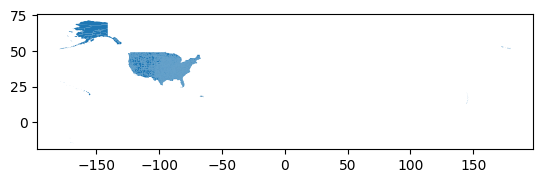

In [19]:
# 5. Plot the geo-dataframe
counties.plot()

### Data selection

Select all the counties for the state of New York in a new variable `ny_counties` and plot them. HINT: to find which counties correspond to NY, look at the metadata.

Looking at the metadata each state has a unique FIPS code in the `statefp` column. Observing the `counties` dataframe we see that New York unique state FIPS is 36. 

In [20]:
# Select all the counties for the state of New York
# New York unique statefp is 36
counties[counties.name == "New York"] 

,statefp,countyfp,countyns,geoid,name,namelsad,lsad,classfp,mtfcc,csafp,cbsafp,metdivfp,funcstat,aland,awater,intptlat,intptlon,geometry
2446,36,061,00974129,36061,New York,New York County,06,H6,G4020,NaN,NaN,NaN,C,58683880,29010416,+40.7766419,-073.9701871,"MULTIPOLYGON (((-74.04721 40.69089, -74.04719 ..."


/opt/python/3.7.13/lib/python3.7/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<AxesSubplot:>

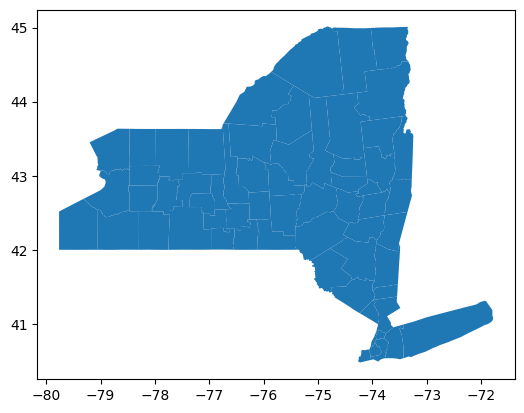

In [21]:
# Select all the counties for the state of New York
ny_counties = counties[counties.statefp == '36']

# Plot NY counties
ny_counties.plot()

## Merging

The goal of this section is to create a single dataframe with the number of spills per county and the corresponding geometries for each county.

### Explore data

In the next cells:

1. Print the names of counties in `ny_counties`, without repetition.
2. Print the names of counties in `spills_per_county`, without repetition. (Do you notice anything?)
3. Use the [`numpy` function `setdiff1d()`](https://numpy.org/doc/stable/reference/generated/numpy.setdiff1d.html) to find the county names that are in `spills_per_county`, but not in `ny_counties`. HINT: pay attention to the example in the documentation.
4. Find the county names that are in `ny_counties`, but not in `spills_per_county`.
5. Check the number of spills in 'Tuscarora Indian Reservation'.


In [22]:
# 1. Print unique names of NY counties
ny_counties.name.unique()

array(['Steuben', 'Saratoga', 'Allegany', 'Oswego', 'Ulster',
       'St. Lawrence', 'Schuyler', 'Essex', 'Suffolk', 'Hamilton',
       'Dutchess', 'Otsego', 'Tompkins', 'Albany', 'Cayuga', 'Greene',
       'Herkimer', 'Warren', 'Jefferson', 'Clinton', 'Nassau', 'Madison',
       'Washington', 'Westchester', 'Lewis', 'Ontario', 'Cortland',
       'Richmond', 'Erie', 'Putnam', 'Montgomery', 'Sullivan', 'Orleans',
       'Oneida', 'Cattaraugus', 'Yates', 'Tioga', 'Monroe', 'Schoharie',
       'Broome', 'Rensselaer', 'Seneca', 'Queens', 'Genesee', 'Wayne',
       'Niagara', 'Kings', 'Chemung', 'Wyoming', 'New York', 'Columbia',
       'Chautauqua', 'Franklin', 'Onondaga', 'Chenango', 'Fulton',
       'Rockland', 'Livingston', 'Delaware', 'Orange', 'Schenectady',
       'Bronx'], dtype=object)

In [23]:
# 2.Print the names of counties in spills_per_county, without repetition. 
#(Do you notice anything?)
print(spills_per_county.county.unique())

['Albany' 'Allegany' 'Bronx' 'Broome' 'Cattaraugus' 'Cayuga' 'Chautauqua'
 'Chemung' 'Chenango' 'Clinton' 'Columbia' 'Cortland' 'Delaware'
 'Dutchess' 'Erie' 'Essex' 'Franklin' 'Fulton' 'Genesee' 'Greene'
 'Hamilton' 'Herkimer' 'Jefferson' 'Kings' 'Lewis' 'Livingston' 'Madison'
 'Monroe' 'Montgomery' 'Nassau' 'New Jersey - Region 2' 'New York'
 'Niagara' 'Oneida' 'Onondaga' 'Ontario' 'Orange' 'Orleans' 'Oswego'
 'Otsego' 'Putnam' 'Queens' 'Rensselaer' 'Richmond' 'Rockland' 'Saratoga'
 'Schenectady' 'Schoharie' 'Schuyler' 'Seneca' 'St Lawrence' 'Steuben'
 'Suffolk' 'Sullivan' 'Tioga' 'Tompkins' 'Tuscarora Indian Reservation'
 'Ulster' 'Warren' 'Washington' 'Wayne' 'Westchester' 'Wyoming' 'Yates']


In [24]:
# Unique names in ny_counties
print("ny_counties unique names:",ny_counties.name.nunique())
# Unique names in spills_per_county 
print("spills_per_county unique names:",spills_per_county.county.nunique())

ny_counties unique names: 62
spills_per_county unique names: 64


The `spills_per_county` has two extra unique names in the dataframe. One of them is 'New Jersey - Region 2 that is not a part of New York counties. There is one more that is not included in the `ny_counties`

In [25]:
# 3.Use the numpy function setdiff1d() to find the county names that 
# are in spills_per_county, but not in ny_counties. 
# HINT: pay attention to the example in the documentation.
np.setdiff1d(spills_per_county.county,ny_counties.name)

array(['New Jersey - Region 2', 'St Lawrence',
       'Tuscarora Indian Reservation'], dtype=object)

In [26]:
# Find the county names that are in `ny_counties`, but not in `spills_per_county`.
np.setdiff1d(ny_counties.name,spills_per_county.county)

array(['St. Lawrence'], dtype=object)

In [27]:
# 5. Check the number of spills in 'Tuscarora Indian Reservation'.
# There is only 1 spill in Tuscarora Indian Reservation
spills_per_county[spills_per_county.county == 'Tuscarora Indian Reservation']

,county,n_spills
56,Tuscarora Indian Reservation,1


### Data updates

In this section we will update 'St Lawrence' to 'St. Lawrence' in `spills_per_county` data frame.

In the next cells:
1. Check the row in `spills_per_county` that has 'St Lawrence'
2. Run the code and read the explanation in the comments
3. Run the code and read the explanation in the comments
4. Use the `st_lawrence_index` and `at` to update St Lawrence name in `spills_per_county` dataframe
5. Check the update was successfull

In [28]:
# 1. Check the row in spills_per_county that has 'St Lawrence'
spills_per_county[spills_per_county.county == "St Lawrence"]

,county,n_spills
50,St Lawrence,62


In [29]:
# 2. we can get the index of that single row like this, 
# to access the actual row index...
spills_per_county[spills_per_county.county=='St Lawrence'].index

Int64Index([50], dtype='int64')

In [30]:
# 3. we need to select the first item in that tuple using [0]
st_lawrence_index = spills_per_county[spills_per_county.county=='St Lawrence'].index[0]
st_lawrence_index

50

In [31]:
# 4. Use the st_lawrence_index and at to update St Lawrence 
# name in spills_per_county dataframe
spills_per_county.at[st_lawrence_index,'county'] = "St. Lawrence"

In [32]:
# 5. Check St.Lawrence has been updated
spills_per_county.county[st_lawrence_index]

'St. Lawrence'

### Merge

In the following cells:
1. Use this cell to make any other updates needed for making an inner join of the `spills_per_county` and `ny_counties`. 
2. Over-write `ny_counties` as the  inner join of the `spills_per_county` and `ny_counties` dataframes.

From our previous exploration we know that Tuscarora Indian Reservation will not be in the join. Tuscarora Indian Reservation is located within Niagara county. 

3. Since the Tuscarora Indian Reservation does not appear in the `ny_counties` dataframe, add one spill to Niagara county. We will add a note about this in our final map. Add the cells you need to make this update **and** verify that the dataframe was updated.

In [33]:
# 1. There isn't a common column between the datasets
print(spills_per_county.columns)
print(ny_counties.columns)

# Rename ny_counties 'name' column to 'county' to match ny_counties
ny_counties = ny_counties.rename(columns={'name':'county'})


Index(['county', 'n_spills'], dtype='object')
Index(['statefp', 'countyfp', 'countyns', 'geoid', 'name', 'namelsad', 'lsad',
       'classfp', 'mtfcc', 'csafp', 'cbsafp', 'metdivfp', 'funcstat', 'aland',
       'awater', 'intptlat', 'intptlon', 'geometry'],
      dtype='object')


In [34]:
# 2.Inner join of spills_per_county and ny_counties
ny_counties = pd.merge(ny_counties,
                       spills_per_county,
                       how = "inner",
                       on = "county")
# View first few rows of ny_counties
ny_counties.head(3)

,statefp,countyfp,countyns,geoid,county,namelsad,lsad,classfp,mtfcc,csafp,cbsafp,metdivfp,funcstat,aland,awater,intptlat,intptlon,geometry,n_spills
0,36,101,00974148,36101,Steuben,Steuben County,06,H1,G4020,NaN,NaN,NaN,A,3601398422,35039875,+42.2667252,-077.3855253,"POLYGON ((-77.08327 42.00002, -77.09391 41.999...",68
1,36,091,00974143,36091,Saratoga,Saratoga County,06,H1,G4020,NaN,NaN,NaN,A,2097812305,87488004,+43.1061353,-073.8553872,"POLYGON ((-73.67891 42.91221, -73.67938 42.911...",154
2,36,003,00974100,36003,Allegany,Allegany County,06,H1,G4020,NaN,NaN,NaN,A,2666225086,12989848,+42.2478532,-078.0261531,"POLYGON ((-78.04342 42.51846, -78.04326 42.518...",29


In [35]:
#3.Since the Tuscarora Indian Reservation does not appear in the `ny_counties`
#dataframe, add one spill to Niagara county. We will add a note about this in 
#our final map. Add the cells you need to make this update **and** verify 
#that the dataframe was updated.

# Set the index for the column with Niagara as niagara_index
niagara_index = ny_counties[ny_counties.county == "Niagara"].index[0]
#Index value
niagara_index

# Add one spill to Niagara county in n_spills 
ny_counties.at[niagara_index,'n_spills'] += 1

In [36]:
# Verify dataframe was updated and n_spills is now 89 
ny_counties[ny_counties.county == "Niagara"]

,statefp,countyfp,countyns,geoid,county,namelsad,lsad,classfp,mtfcc,csafp,cbsafp,metdivfp,funcstat,aland,awater,intptlat,intptlon,geometry,n_spills
45,36,063,00974130,36063,Niagara,Niagara County,06,H1,G4020,NaN,NaN,NaN,A,1352887560,1598842379,+43.2726719,-078.8129431,"POLYGON ((-78.49165 43.08396, -78.49179 43.084...",89


## Map
Create a choropleth map of the number of petroleum spills per county in the state of New York in 2023. 
Your map should have (at least) the following updates:
- a legend indicating the number of spills
- an updated color map
- a title 
- no axis
- an annotation with the data source (New York State Department of Environmental Conservation), date of access HINT: check the graph we did for power plants, 
- an annotation indicating one spill occurred in Tuscarora Indian Reservation within Niagara county

Tuscarora Indian Reservation in Niagara county

/opt/python/3.7.13/lib/python3.7/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<AxesSubplot:title={'center':'New York State Number of Oil Spills per County'}>

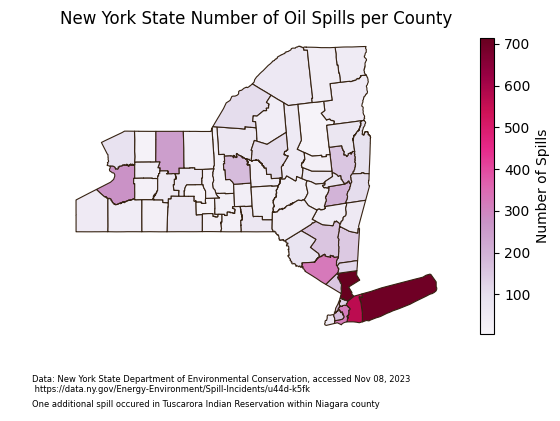

In [87]:
# 
fig, ax = plt.subplots()

#Remove the axis box around the map
ax.axis('off')

# annotate the data source of New York State Department of Environmental Conservation spills
ax.annotate("Data: New York State Department of Environmental Conservation, accessed Nov 08, 2023 \n https://data.ny.gov/Energy-Environment/Spill-Incidents/u44d-k5fk", 
            xy=(0.05, .06), # position
            xycoords='figure fraction', 
            fontsize=6, 
            color='#000000')

# Annotate the additional spill that occured in Tuscarora Indian Reservation within Niagara county
ax.annotate("One additional spill occured in Tuscarora Indian Reservation within Niagara county",
           xy=(0.05,0.03),
           xycoords='figure fraction',
           fontsize=6,
           color='#000000')

#Update the title
ax.set_title('New York State Number of Oil Spills per County')
ny_counties.plot(ax=ax,
                column = 'n_spills',
                edgecolor = '#362312',
                linewidth = 0.8,
                cmap = 'PuRd',
                legend = True,
                 legend_kwds={"shrink":.8,
                              'label': "Number of Spills"}
                       )

## Final code

Collect all the relevant code into the first blank cell of the notebook titled "FINAL CODE". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The *only* ouput of this cell should be the graph you produced in the previous exercise. For each line, add a single comment explaining what the code does.